In [338]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# generate 5 clusters data
k = 5
X, y = make_blobs(n_samples=100, centers=k, random_state=42)

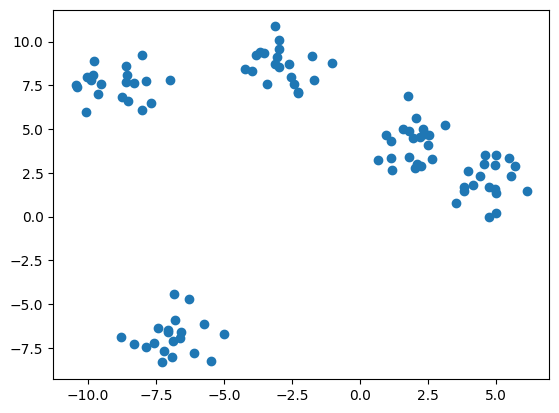

In [339]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

In [340]:
k=5
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 4, 3, 4, 2, 1, 0, 0, 0, 3, 3, 1, 4, 3, 0, 2, 4, 4, 1, 2, 2, 0,
       3, 1, 2, 2, 4, 4, 4, 0, 1, 2, 4, 4, 4, 2, 3, 3, 3, 0, 1, 0, 0, 0,
       2, 3, 3, 1, 2, 4, 4, 0, 0, 1, 0, 2, 4, 4, 3, 3, 0, 3, 2, 1, 2, 1,
       4, 4, 1, 4, 2, 1, 1, 1, 4, 2, 0, 2, 4, 1, 4, 1, 2, 0, 2, 3, 2, 3,
       3, 3, 2, 3, 1, 0, 1, 3, 1, 3, 0, 0], dtype=int32)

In [341]:
y_pred is (kmeans.labels_)

True

In [342]:
min1 = min(X[:,0])
max1 = max(X[:,0])
min2 = min(X[:,1])
max2 = max(X[:,1])

print("X0 : Min = ", min1, "Max = ", max1)
print("X1 : Min = ", min2, "Max = ", max2)
kmeans.labels_

X0 : Min =  -10.445810991197238 Max =  6.117772880969618
X1 : Min =  -8.343624541408065 Max =  10.86656431270726


array([1, 4, 3, 4, 2, 1, 0, 0, 0, 3, 3, 1, 4, 3, 0, 2, 4, 4, 1, 2, 2, 0,
       3, 1, 2, 2, 4, 4, 4, 0, 1, 2, 4, 4, 4, 2, 3, 3, 3, 0, 1, 0, 0, 0,
       2, 3, 3, 1, 2, 4, 4, 0, 0, 1, 0, 2, 4, 4, 3, 3, 0, 3, 2, 1, 2, 1,
       4, 4, 1, 4, 2, 1, 1, 1, 4, 2, 0, 2, 4, 1, 4, 1, 2, 0, 2, 3, 2, 3,
       3, 3, 2, 3, 1, 0, 1, 3, 1, 3, 0, 0], dtype=int32)

In [343]:
print("Generated Labels :\n", kmeans.labels_)
print("\nCluster Centers :\n", kmeans.cluster_centers_)

Generated Labels :
 [1 4 3 4 2 1 0 0 0 3 3 1 4 3 0 2 4 4 1 2 2 0 3 1 2 2 4 4 4 0 1 2 4 4 4 2 3
 3 3 0 1 0 0 0 2 3 3 1 2 4 4 0 0 1 0 2 4 4 3 3 0 3 2 1 2 1 4 4 1 4 2 1 1 1
 4 2 0 2 4 1 4 1 2 0 2 3 2 3 3 3 2 3 1 0 1 3 1 3 0 0]

Cluster Centers :
 [[ 4.73987759  2.0192694 ]
 [-6.88732163 -6.84846391]
 [-8.97484095  7.55134937]
 [-2.87559086  8.66758942]
 [ 1.90144007  4.22597687]]


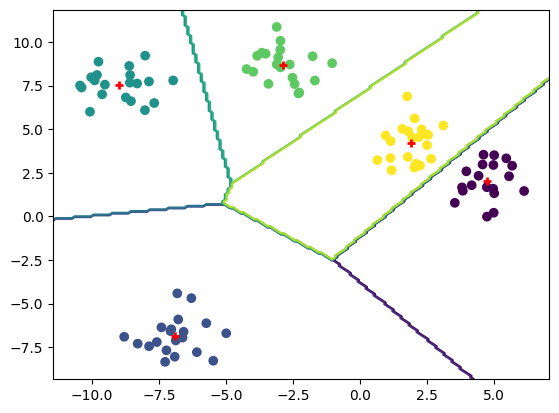

In [344]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X[:,0], X[:,1], c=y_pred)
# mark centroids with '+' symbol in red color
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='red', 
            marker='+', linewidth=2)

# Create meshgrid for contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict cluster labels for each point in the meshgrid
bound_predict = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
bound_predict = bound_predict.reshape(xx.shape)

# Plot data with contour plot for decision boundaries
plt.contour(xx, yy, bound_predict)

plt.show()

In [345]:
import numpy as np
X_new = np.array([[-2.5, 8.1], [-7.5, 2], [5.2, 1.98], [-4.9, 8.5], [-8.5, 2.1]])
kmeans.predict(X_new)

array([3, 2, 0, 3, 2], dtype=int32)

In [346]:
pred_new_y = kmeans.transform(X_new).round(2)
pred_new_y
#pred_new_y.sum(axis=1)


array([[ 9.45, 15.58,  6.5 ,  0.68,  5.86],
       [12.24,  8.87,  5.74,  8.11,  9.66],
       [ 0.46, 14.97, 15.23, 10.49,  3.99],
       [11.62, 15.48,  4.18,  2.03,  8.03],
       [13.24,  9.09,  5.47,  8.65, 10.62]])

In [347]:
np.argmax(pred_new_y, axis=1)

array([1, 0, 2, 1, 0])

In [348]:
kmeans.inertia_

159.83755106823412

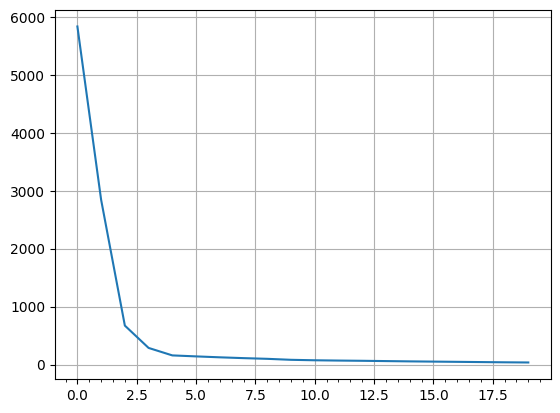

In [349]:
# draw intertia vs clusters graph upto 20 centroids
from sklearn.metrics import silhouette_score
from matplotlib.ticker import AutoLocator, AutoMinorLocator

max_iter = 20
sil_score = []
inertia = np.full((max_iter, 2), -100)
for k in range(inertia.shape[0]):
    kmeans = KMeans(n_clusters=k+1, n_init=10, random_state=42)
    kmeans.fit_predict(X)
    inertia[k,0] = k
    inertia[k,1] = kmeans.inertia_

fig, ax = plt.subplots()
ax.plot(inertia[:,0],inertia[:,1])
ax.grid()
ax.xaxis.set_major_locator(AutoLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.show()

In [350]:
print(silhouette_score(X, kmeans.labels_))

0.3910794705427698


In [351]:
import PIL
filepath = 'ladybug.png'
image = np.asarray(PIL.Image.open(filepath))
image.shape

(200, 252, 3)

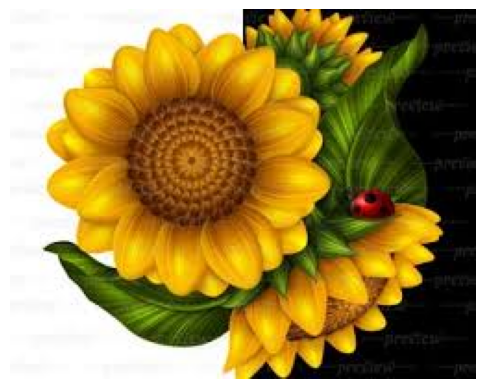

In [352]:
# Display the image
plt.imshow(image.astype(np.uint8))
#plt.imshow(image.astype(np.int0))
plt.axis('off')
plt.show()

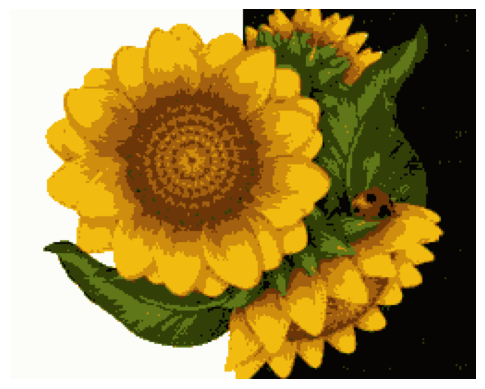

In [353]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
# Display the image
plt.imshow(segmented_img.astype(np.uint8))
plt.axis('off')
plt.show()

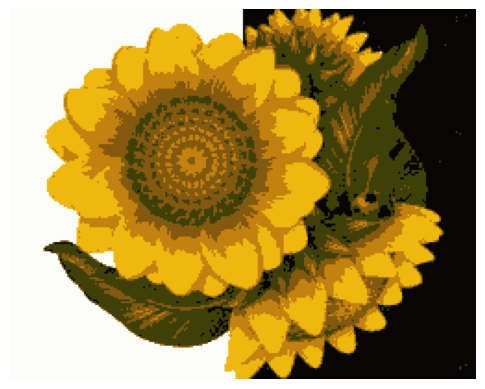

In [354]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
# Display the image
plt.imshow(segmented_img.astype(np.uint8))
plt.axis('off')
plt.show()

### Semi-Supervised learning using KMeans clusture


In [355]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

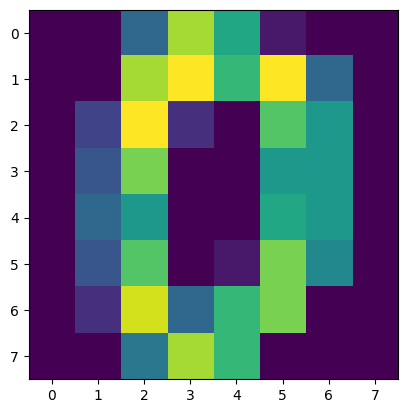

In [356]:
# see how an image loks
plt.imshow(X_digits[0:1].reshape(8,8))
plt.show()

In [357]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
np.round(log_reg.score(X_test, y_test)*100, 2)

74.81

In [358]:
# score on entire dataset. just to see how much it is
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
np.round(log_reg.score(X_test, y_test)*100, 2)

90.68

In [359]:
k=50
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42) 
# get distance from every centroid for the current digit in a row
X_digits_dist = kmeans.fit_transform(X_train) 
# return index of the closest digit to a centroid (there are 50 centroids)
representative_digit_idx = np.argmin(X_digits_dist, axis=0) 
# get the representative digits for every centroid or cluster
X_representative_digits = X_train[representative_digit_idx]
X_representative_digits

array([[ 0.,  0.,  1., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  1.,  0.],
       [ 0.,  0.,  0., ..., 16.,  7.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0., 12., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.]])

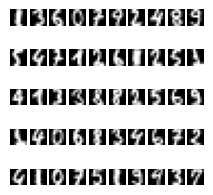

In [360]:
# Create a figure with 100 subplots
fig, axs = plt.subplots(5, 10, figsize=(2.5, 2.5))
# Flatten the subplot array to make it easier to iterate over
axs = axs.flatten()
for i, ax in enumerate(axs):
    ax.imshow(X_representative_digits[i:i+1, :].reshape(8,8), cmap='gray')
     # Add a title to each subplot
    #ax.set_title(representative_digit_idx[i])
    ax.axis('off')
plt.show()


In [361]:
# here are the representative digits (labelled manually), for every centroid
y_representative_digits = np.array([1,3,6,0,7,9,2,4,8,9,
                                    5,4,7,1,2,6,1,2,5,1,
                                    4,1,3,3,8,8,2,5,6,9,
                                    1,4,0,6,8,3,4,6,7,2,
                                    4,1,0,7,5,1,9,9,3,7])
y_representative_digits

array([1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 4, 1,
       3, 3, 8, 8, 2, 5, 6, 9, 1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 4, 1, 0, 7,
       5, 1, 9, 9, 3, 7])

In [362]:
from sklearn.linear_model import LogisticRegression
# use logistic regression and get the score
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, y_representative_digits)
np.round(log_reg.score(X_test, y_test)*100, 2)

84.89

In [363]:
k=50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) 
# find out the cluster id for any record
X_train_cluster_id = np.argmin(kmeans.fit_transform(X_train), axis=1)
#X_train_cluster_id.shape
# get the label for that record using digits representing centroids of the cluster
y_kmeans = y_representative_digits[X_train_cluster_id]

In [364]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_kmeans)
np.round(log_reg.score(X_test, y_test)*100, 2)

89.42

In [376]:
k=50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) 

dist_from_centroids = kmeans.fit_transform(X_train)
dist_from_center = np.empty(len(X_train), dtype=np.int64)

for index in range(dist_from_centroids.shape[0]):
    dist_from_center[index] = min(dist_from_centroids[index])

In [387]:
import numpy as np
# remove x_pc percent values with highest values
def remove_top_x_percent(array, x_pc):
    # Sort the array in descending order
    sorted_array = np.sort(array, axis=0)[::-1]
    # Calculate the number of rows to remove
    num_to_remove = int(array.shape[0] * x_pc/100)
    # Get the threshold value
    threshold = sorted_array[num_to_remove - 1]
    # Get the indices of rows with values greater than the threshold
    idx = np.where(array >= threshold)
    # Remove the rows with values greater than the threshold
    array[idx] = -1
    return array


In [388]:
dist_from_center_no_outlier = remove_top_x_percent(dist_from_center, 1)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[dist_from_center_no_outlier != -1], y_kmeans[dist_from_center_no_outlier != -1])
np.round(log_reg.score(X_test, y_test)*100, 2)

90.18